#cars Recognizer
The goal of this project is to classify the logos of 20 different car brands from around the world. The types are following: <br/>

* Audi car logo
* BMW car logo
* Chevrolet car logo
* Dodge car logo
* Ford car logo
* Honda car logo
* Hyundai car logo
* Jaguar car logo
* Jeep car logo
* Kia car logo
* Land Rover car logo
* Lexus car logo
* Mazda car logo
* Mercedes-Benz car logo
* Nissan car logo
* Porsche car logo
* Subaru car logo
* Tesla car logo
* Toyota car logo
* Volkswagen car logo




##Setting up the necessary things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32
version = 1

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourseML/week-8/logo classification

/content/drive/My Drive/MasterCourseML/week-8/logo classification


In [ ]:
ls

 data/  'data loaders'/   models/   test_images/


In [ ]:
# not necessary. to zip the data that i have collected and save it to drive
# !zip -r '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourseML/week-8/cap recognizer/data'

##Fetch data

In [ ]:
data_path = "data"

#creating datablock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))



In [ ]:
#data augmentations. (we can do data augmentation in three more ways as well)
dblock = dblock.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())

# dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size. 'new' is used for data augmentation
# dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
# dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size

#dataloaders
dls = dblock.dataloaders(data_path, bs=32)


In [ ]:
#check what are the serial of the labels that model done
dls.train.vocab

['Audi car logo', 'BMW car logo', 'Chevrolet car logo', 'Dodge car logo', 'Ford car logo', 'Honda car logo', 'Hyundai car logo', 'Jaguar car logo', 'Jeep car logo', 'Kia car logo', 'Land Rover car logo', 'Lexus car logo', 'Mazda car logo', 'Mercedes-Benz car logo', 'Nissan car logo', 'Porsche car logo', 'Subaru car logo', 'Tesla car logo', 'Toyota car logo', 'Volkswagen car logo']

In [ ]:
#save file for further use.
torch.save(dls, f"data loaders/cap_dataloader_v{version}.pkl")

In [ ]:
#load the pkl file for further use
# dls = torch.load(f"data loaders/cap_dataloader_v{version}.pkl")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


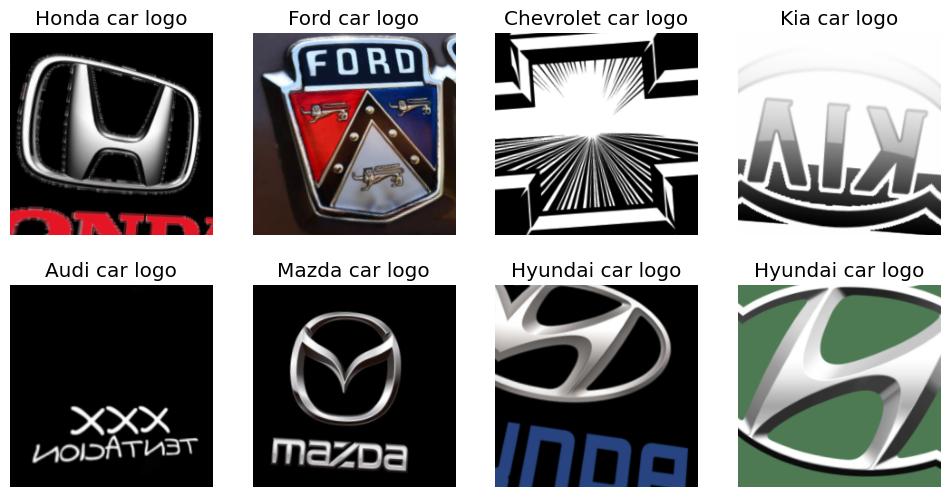

In [ ]:
#show some data from train dataset
dls.train.show_batch(max_n=8, nrows=2)

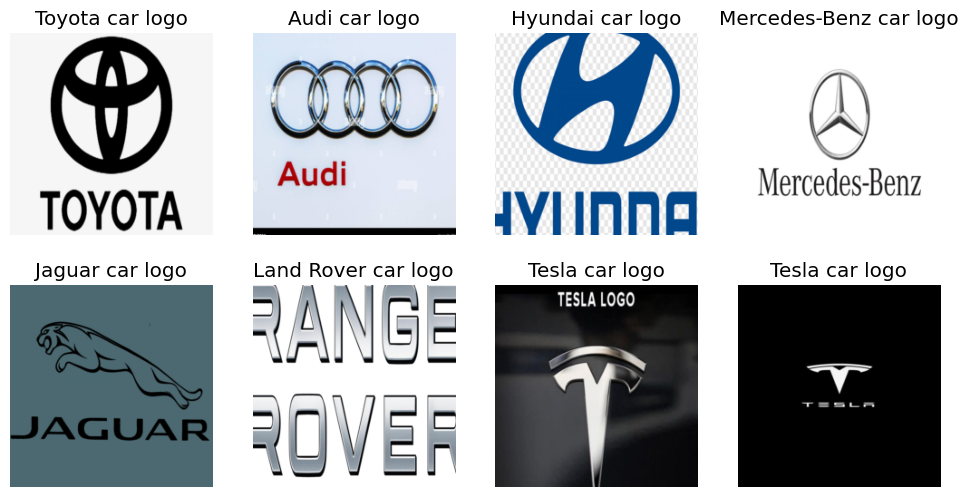

In [ ]:
#show some data from validation dataset
dls.valid.show_batch(max_n=8, nrows=2)

##Training and Data cleaning

In [ ]:
#path where model will save after training
model_path = 'models'

In [ ]:
#load model for further used or for inference
# model.load(f"{model_path}/cap_recognizer_v{version-1}")

In [ ]:
#load model or metrics before training
model = vision_learner(dls, resnet101, metrics = [error_rate, accuracy])    #we can replace resnet34 by any model from timm or that are accessible by fastai

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 177MB/s]


In [ ]:
#fine tune the pre-trained model (training)
model.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.994773,0.890754,0.203343,0.796657,01:50


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.888060,0.603161,0.142061,0.857939,01:57
1,0.674202,0.435983,0.111421,0.888579,01:57
2,0.487095,0.413696,0.097493,0.902507,01:56
3,0.385355,0.431472,0.103064,0.896936,01:56
4,0.288608,0.347023,0.077994,0.922006,01:57
5,0.238191,0.383492,0.080780,0.919220,01:55
6,0.187016,0.334938,0.072423,0.927577,01:56
7,0.126998,0.324130,0.069638,0.930362,01:55
8,0.106359,0.330249,0.069638,0.930362,01:56
9,0.082729,0.296306,0.072423,0.927577,01:55


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in by

In [ ]:
#save model (when pc tured off or something happen we can do the rest of the training by load the saving model. it's also needs for inference)
model.save(f"logo_recognizer_v{version}")

Path('models/logo_recognizer_v1.pth')

##Export model for inference

In [ ]:
model.export(f"logo_recognizer_v{version}.pkl")